<a href="https://colab.research.google.com/github/pawljmlo/dawid-phd/blob/main/primary-topics-clusterisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## interesting resources

https://towardsdatascience.com/clustering-documents-with-python-97314ad6a78d

https://github.com/sdadas/polish-nlp-resources

https://clarin-pl.eu/dspace/handle/11321/442

https://ermlab.com/blog/technicznie/ewaluacja-polskich-word-embeddingow/


# simple vectorization (TF-IDF)

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

In [11]:
df = pd.read_csv('Dawus-nerwica.csv', index_col="Unnamed: 0")
topics = list(df.topic.values)

In [12]:
vectorizer = TfidfVectorizer(stop_words={'polish'})
X = vectorizer.fit_transform(topics)

In [15]:
print(vectorizer.get_feature_names())
print(X.shape)

['10', '100', '12', '14', '15', '18', '2015', '20mg', '24', '25', '26', '30', '3latka', '40', '4rty', '75', '75mg', '90', 'abilify', 'abramowicach', 'absolutna', 'abstynencyjny', 'aby', 'ach', 'acodin', 'actavis', 'adaptacyjna', 'adaptacyjne', 'aerofagia', 'afektywne', 'afektywnych', 'afobam', 'agorafobia', 'agorafobią', 'agresja', 'agresje', 'agresji', 'agresją', 'agresywne', 'agresywnością', 'agrofobia', 'aidsofobia', 'akceptacja', 'akceptacji', 'akceptowani', 'akrofobia', 'aktorka', 'aktualizacja', 'akupunktura', 'akupunkturą', 'akurat', 'albo', 'ale', 'alergia', 'alergią', 'alkochol', 'alkocholu', 'alkohol', 'alkoholem', 'alkoholizm', 'alkoholu', 'alpragenu', 'alternatywny', 'alventa', 'alzhajmera', 'ambiwalencja', 'anafranil', 'analiza', 'androfobia', 'ang', 'angielskiego', 'ani', 'anka', 'ankieta', 'anoreksji', 'antybiotyk', 'antybiotyki', 'antydepresantach', 'antydepresantami', 'antydepresanty', 'antykoncepcja', 'antykoncepcyjne', 'apataia', 'apetyt', 'apetytu', 'apogeum', 'apro

In [22]:
topics[0]

'Czy to są objawy nerwicy?-WĄTEK ZBIORCZY'

In [19]:
print(X[0,])

  (0, 4733)	0.5170711369216314
  (0, 4565)	0.505114959587387
  (0, 2027)	0.27165287366816787
  (0, 2235)	0.3268033939829105
  (0, 3847)	0.44502697727384805
  (0, 3934)	0.23535552801670157
  (0, 515)	0.2084690379964428


# kMeans

In [23]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


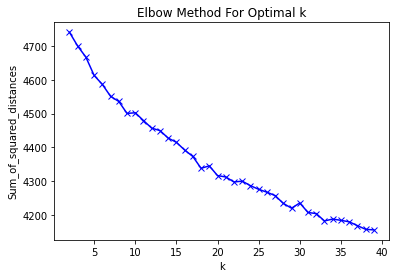

In [26]:
sum_of_squared_distances = []

K = range(2,40)
for k in K:
  print(k)
  
  km = KMeans(n_clusters=k, max_iter=200, n_init=10)
  km = km.fit(X)
  sum_of_squared_distances.append(km.inertia_)

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [31]:
true_k = 35
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
model.fit(X)
labels=model.labels_
boards_cl=pd.DataFrame(list(zip(topics,labels)),columns=['title','cluster'])
print(boards_cl.sort_values(by=['cluster']))

                                                  title  cluster
1096                                     Nerwica lekowa        0
4529                             czy to nerwica lekowa?        0
4519                                     nerwica lekowa        0
926                              Czy to nerwica lekowa?        0
3689           Nerwica natrectw czy lekowa? Schiza ? :(        0
...                                                 ...      ...
1347          Bóle kręgosłupa, zawroty głowy a nerwica?       34
3131  Zasłabnięcie - fobia - zawroty głowy po wysiłk...       34
573                               napięciowe bóle głowy       34
1243                                      Zawroty głowy       34
2172      zawroty głowy, nerwy, stres, uczucie omdlenia       34

[4886 rows x 2 columns]


53

Cluster: 0
Titles
There are 37 topics
                                    Nerwica lekowa
                                    nerwica lekowa
    Nerwica lekowa, natrectw i wszystko co możliwe
                        Nerwica lekowa jakie leki?
                   Praca zawodowa i nerwica lekowa
                                    Nerwica lekowa
                                    Nerwica lekowa
                            Czy to nerwica lekowa?
                            Nerwica lekowa\pomocy.
                                    Nerwica lekowa
                           Nerwica lekowa pomocy!!
                          Moja nerwica lekowa ....
                       dopadła mnie nerwica lekowa
                   Nerwica lekowa a wyglad twarzy.
         zielsko nerwica lekowa i niepokojacy puls
                                    nerwica lekowa
              NERWICA LEKOWA CHOROBA NIE ULECZALNA
                         Nerwica lekowa a slodycze
                                    nerwica 

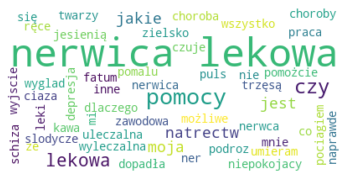

Cluster: 1
Titles
There are 142 topics
 Zapisałem się do psychiatry - nie wiem czy to ...
                 Czy to nerwica? Już nie mam sił:(
                      Już nie wiem co mam zrobić 😭
 Nie mogę zabrać się (a tym bardziej zakończyć)...
                          Gdy nie ten ból i lęk...
                                  Już sam nie wiem
                     Już nie mogę z tymi myślami .
                        Nie radzę sobie ze stresem
             Nie wiem czy mam się tym przejmować..
                Paniczny lęk - nie daje sobie rady
    Nie radzę sobie z lękami po próbie samobójczej
                  Nie przedłużyli mi umowy w pracy
                               Nie daje już rady 😥
                   Lękowcy nie palcie marihuany...
                                        nie zdalem
         Nie mogę tego wytrzymać, moj przypadek :(
 Kochani mam taki problem . Zauważyłam u siebie...
                                Leki nie pomagaja?
                   Nie mogę funkcjonować be

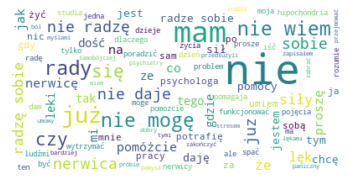

Cluster: 2
Titles
There are 50 topics
                                  Fobia społeczna!
                                   Fobia społeczna
     Lęk przed rodzicami - czy to fobia społeczna?
         Fobia społeczna a wystąpienia na studiach
 Fobia społeczna - odpowiedzi ustne z angielskiego
          Fobia społeczna - boję się ataku innych.
                    Czy to jest fobia (społeczna)?
                                Czy to jest fobia?
                  Nieśmiałość czy fobia społeczna?
                  Nerwica lękowa + fobia społeczna
                      fobia społeczna - moim okiem
 Fobia społeczna i Brintellix który nie działa,...
                              Moja fobia szkolna;/
                                     fobia szkolna
 Fobia społeczna - spójność wypowiedzi, podtrzy...
                           czy to fobia społeczna?
                           Czy to fobia społeczna?
 Apogeum nieśmiałości czy może to już fobia spo...
                               Fobia komunik

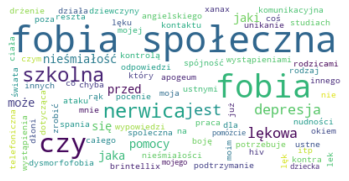

Cluster: 3
Titles
There are 30 topics
                          Zjednoczone Stany Lękowe
          Zaburzenie lękowe. Myśli egzystencjalne.
                                      Stany lękowe
                            nerwica i stany lękowe
                       Dziecięce zaburzenia lękowe
                                      Stany lękowe
                                Stany lękowe a CBD
                             Stany lękowe studenta
                     homofobia a zaburzenia lękowe
 Helicobacter pylori a zaburzenia depresyjno lę...
          Zaburzenia somatyczne i lękowe - nerwica
                       Studia, a zaburzenia lękowe
                                 Zaburzenia lękowe
                        Szkoła a zaburzenia lękowe
           Zaburzenia lękowe a codzienność i praca
             Zaburzenia lękowe F410/ moja historia
                                      Stany lękowe
                                     stany lękowe?
                                      STANY 

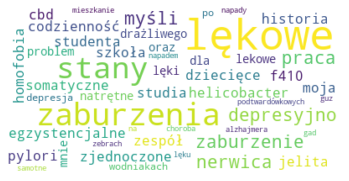

Cluster: 4
Titles
There are 83 topics
                            Lęki przed shizofrenią
                        Czy te lęki to psychotyki?
                                Abilify na lęki...
                                    Natrętne lęki.
                             Lęki hipochondryczne.
                                        Lęki nocne
   Mam dziwne lęki, że zostane do końca życia sama
                         głod, przejedzenie i lęki
        Czy ktos ma lęki/ataki paniki po alkoholu?
                                         Moje lęki
                                              Lęki
                        Brak snu i lęki nerwicowe.
         nerwica a silne lęki po spożyciu alkoholu
                                  Lęki po imprezie
                  Kompleks dziecka? Lęki? Nerwica?
                                  Nawracające lęki
 Lęki przed macierzyństwem ostatniej szansy,gam...
             depresja,lęki a niedobór witaminy B12
                   LĘKI SPOŁECZNE, OBJAWY FI

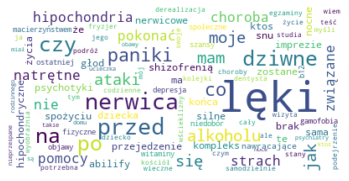

Cluster: 5
Titles
There are 1 topics
 POMOCY WYSIADAM


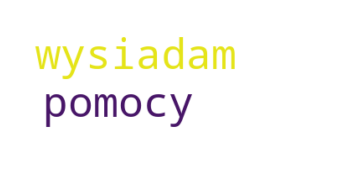

Cluster: 6
Titles
There are 230 topics
      Klaustrofobia - czy ktoś ma, czuje podobnie?
         Czy ktoś z was stosował trening Schultza?
                         SM, nerwica czy borelioza
                        Czy są tu mamy z nerwica ?
                 Czy ktoś kiedyś z niej wyszedł !?
                          Pulsowanie. Ktoś tak ma?
                        Nerwica - ktoś też tak ma?
                          Nerwica czy chore serce?
                     Choroba czy głowa? Niewiedza.
                           Czy ktoś miał podobnie?
      Czy to moze byc nerwica czy jednak bakterie?
                       Czy to zespół serotoninowy?
                           Nerwica czy guz mózgu ?
            Czy nerwica moze zniknac bez sladu??!!
                 Częstoskurcz, nerwica czy panika?
 Czy ktoś z was też też tak żałuje straconych lat?
              Uczucie bicia serca, czy to nerwica?
                     Psychoterapia czy cały czas ?
                         objawy moze ktoś t

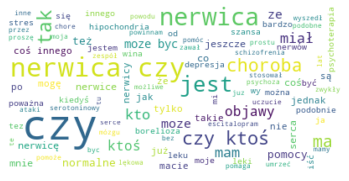

Cluster: 7
Titles
There are 165 topics
                         Co to jest. Proszę o radę
             Co robić z życiem? Wizja 5 lat stresu
           Proszę o pomoc bo nie wiem co mi dolega
                                  Co mam zrobić..?
                               Jaki lek? co robić?
 co robić w takiej sytuacji? (problem z przyjac...
                       nerwica bezsennosc co robic
                                          Co dalej
                                       Co mi jest?
                                   Co to za objaw?
                    Co jest nie tak z moją wiedzą?
                                        Co mi jest
                              Antybiotyk- co robić
                                         Co robić?
                                 Co jest normalne?
                      Co mi jest ? jak z tym zyc ?
          co to jest??? ,, zaburzenia,, przed snem
                                 Co to za życie...
                     Nie wiem co ze sobą zr

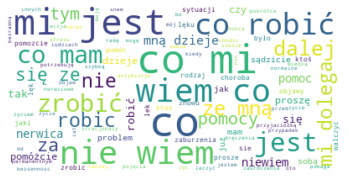

Cluster: 8
Titles
There are 11 topics
                    Nerwicą, bezsenność
           Prawie śmiertelna bezsenność
                Trittico na bezsenność?
             Co doraźnie na bezsenność?
             Bezsenność na tle nerwowym
            Nerwica lękowa a bezsenność
                  Nerwica i bezsenność.
 Nerwica a bezsenność i przypływ energi
                   bezsenność w nerwicy
    bezsenność,nyktofobia, paranoja....
   Bezsenność jak sobie radzić POMOCY!!


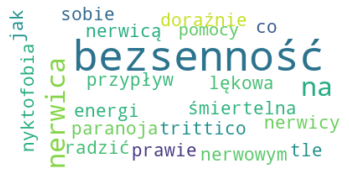

Cluster: 9
Titles
There are 75 topics
 Nerwica Lękowa Co zrobić? Moja historia...część 2
                            Moja ostateczna trauma
           Moja historia - czy to na pewno nerwica
 Nerwica & depresja- moja historia, wskazówki d...
                  12 lat z nerwicą - moja historia
                                 Ja i moja nerwica
 Błagam o pomoc , nerwica czy coś innego ? Moja...
                              Moja droga Wojownika
                     Czy to nerwica? Moja historia
                                      Moja nerwica
                                      Moja nerwica
    Euzebe - moja historia oraz tydzień sam w domu
                                Pecherz=moja zmora
 Do czego doprowadziła mnie nerwica. Moja historia
                                  Moja historia...
                  jak zyje z nerwica-moja historia
                                      Moja nerwica
                               Moja nerwica lękowa
                           Pomóżcie..Moja hi

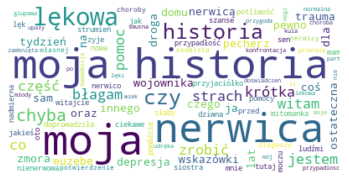

Cluster: 10
Titles
There are 84 topics
            Tokofobia-strach przed ciążą i porodem
      Nerwica lękowa- strach przed homosekualizmem
                     Strach przed własnymi myślami
                            Strach przed RODZICAMI
                                    Strach i złość
 Strach przed Panią, która traktuje mnie jak sw...
           Dentofobia - strach przed stomatologiem
                        Ogromny strach przed pracą
 Strach przed nerwicą i niepewnością w związku/...
                   Strach przed pomiarem cisnienia
                   strach przed chorobą psychiczną
                            Strach przed wyjazdami
                                            Strach
                 Strach przed jutrzejszym wyjazdem
 Paniczny lęk, strach przed wyjazdem na urlop -...
                                    wojna i strach
                    Paniczny strach o najbliższych
                         Strach przed samotnością?
                           agresja strach p

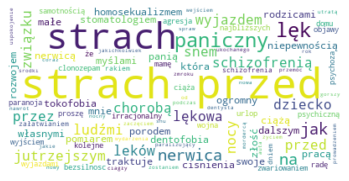

Cluster: 11
Titles
There are 383 topics
                                Nerwica a depresja
               Nerwica / Depresja - inne podejście
                     Nerwica PO treningu sportowym
                         Oddawanie moczu a nerwica
                           Nerwica gardła/przełyku
                                  Nerwica, żołądek
                             Ból brzucha a nerwica
                                           Nerwica
                     Duszność wysiłkowa a nerwica.
                               Ból jądra a nerwica
                             Nerwica a seksualność
                     Nerwica a zaburzenia widzenia
                                 Nerwica przełyku?
                          Ból w odbycie a nerwica?
              Nerwica - więzienie, śmierć, choroby
                                           Nerwica
                                Nerwica - hardcore
                      Nerwica Stres Przed Dentysta
                                   Nerwica

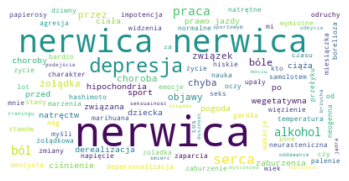

Cluster: 12
Titles
There are 69 topics
                              Pomocy
                              Pomocy
 objawy somatyczne a związek, pomocy
                             Pomocy!
          To już przesada pomocy !!!
                             Pomocy!
                           Pomocy :(
                     Nerwica, pomocy
                              Pomocy
                             Pomocy!
                       Szukam pomocy
            nerwica.. chyba? pomocy!
  NERWICA NATRĘCTW MYŚLOWYCH..pomocy
                   Pomocy , wsparcie
          POMOCY. JESTEM PRZERAŻONA.
                         Pomocy ! :(
                              Pomocy
                              Pomocy
                           pomocy...
                   Nerwica, pomocy!!
      Szukam pomocy, mam kilka pytań
                              pomocy
                 Potrzebuje pomocy !
                   Poszukuję pomocy.
                              POMOCY
                              pomocy

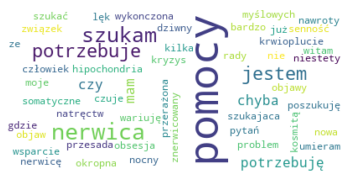

Cluster: 13
Titles
There are 185 topics
  Irracjonalne zamartwianie się o innych (obcych!)
                 Jak nauczyć się połykać tabletki?
            Boje się, że mam początki schizofrenii
 Rola i umiejętności mężczyzny w XXI w. a obwin...
                           Zły sen stał się faktem
       Czy dzielicie się z bliskimi swoimi stanami
                     Przejmowanie się losem innych
                  Budzenie się z brakiem powietrza
                            Boje się o swoje jutro
                                Chyba się poddałam
                Boję się wakacji, nigdzie nie jadę
                                Muszę się wyżalić.
                   Lata lecą i nic się nie zmienia
                boję się siedzieć przed komputerem
                                  Bardzo się boję.
                       Boję się sama zostać w domu
 Jak u was ukazuje się nerwica? Kontynuacja wąt...
      Czuję się jakbym była w prasie hydraulicznej
           Nerwica, depresja, leki, co się

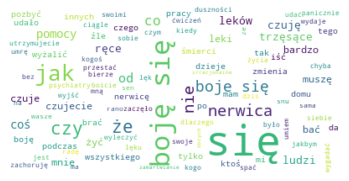

Cluster: 14
Titles
There are 198 topics
                     Kilka metod na pokonanie lęku
                     Jakie leki na nerwicę lękową?
           Nieświadome wypowiadanie czegoś na głos
       Przeprowadzka na wieś i zatrzymanie w życiu
              Leki ma depresje a nasilenie objawów
 Jak wpływają na was leki przeciwlękowe lub nas...
 Czy przez Nerwicę wzrasta nasza szansa na praw...
                    Beta Blokery na Nerwice lękową
                                       SSRI NA NOC
                  Egzamin na prawo jazdy-jak zdać?
                        SPOSÓB NA NERWICE/DEPRESJE
                             Leki na nerwicę i....
                             Leki na nerwicę i....
                                    jestem na dnie
             Odstawiam leki, czas na olej konopny.
                        Leki psychotropowe a ciąża
                                              leki
            Skierowanie na rehabilitacje leczniczą
                      Z Paroksetyny na Dul

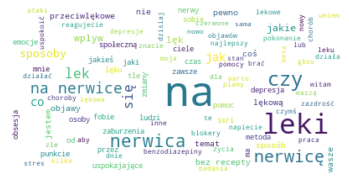

Cluster: 15
Titles
There are 21 topics
          Nerwica - dziwne objawy, prośba o pomoc.
                   Prośba o pomoc. Czy to nerwica?
                             Nerwica prośba o rade
 Prośba o Waszą opinię na temat Moich dolegliwo...
                    Moja historia i prośba o pomoc
                        Prośba o pomoc w diagnozie
                            Nerwica prośba o pomoc
                                 Prośba o diagnozę
                                Prośba o pomoc :-(
                            Prośba o opinie z boku
                                    Prośba o pomoc
               Moja historia i prośba o informacje
        Pierwsze starcie z nerwicą - prośba o rady
        Prośba o pomoc w interpretacji schorzenia?
   Prośba o ogólną diagnozę, ewentualnie wskazówki
           Prośba o wsparcie - moja nerwica lękowa
                 Prośba o przeanalizowanie wypisu.
                     moja nerwica, prośba o poradę
             Specyficzna sytuacja, prośba o

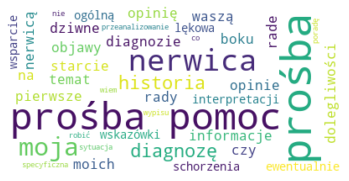

Cluster: 16
Titles
There are 1569 topics
                   Derealizacja. Depersonalizacja.
                               Przełamywanie lęków
                                      Hipochondria
                                     Rodzaje fobii
                     Derealizacja/Depersonalizacja
                Przyspieszenie wizyty u psychiatry
                                    Spięcie miesni
 Hipochondria - jakie choroby sobie przypisywal...
                                          Pramolan
                              Wizyta u pulmonologa
                                       Moje objawy
                                         Kynofobia
                                      Nawrót lęków
              Leżący tryb życia spowodowany lękiem
        Wrażenia napięcia mięścni, duszności, itp.
 Jestem w pracy i złapał mnie ogromny lęk,pomóż...
                     interpretacja nawrotu choroby
        Kaszlący ludzie doprowadzają mnie do szału
                                        T

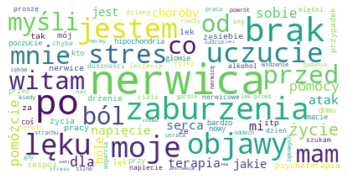

Cluster: 17
Titles
There are 230 topics
 FAGOFOBIA - lęk przed połykaniem, czy ktoś wyl...
 AGORAFOBIA - lęk przed opuszczaniem "czterech ...
                                  Mój lęk paniczny
                        Ciągły lęk o swoje zdrowie
                               Lęk przed alkoholem
              Emetofobia - Lęk przed wymiotowaniem
        Lęk przed byciem osoba molestującą dziecko
                               Lęk przed omdleniem
                         Lęk przed współlokatorami
                         Lęk przed ciążą i porodem
       czego się boimy? Lęk przed.................
                                    Lęk przed snem
                                 lęk przed chorobą
       GLOSSOFOBIA - lęk przed publicznym występem
                      Lęk uogólniony, wolnopłynący
                            Lęk przed poceniem się
                                   lęk separacyjny
                                     Lęk przed...?
                           Lęk przed brani

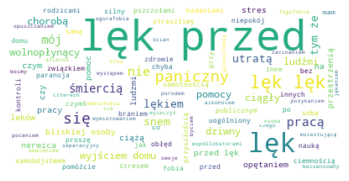

Cluster: 18
Titles
There are 50 topics
                         Dziwne somaty, miał ktoś?
                            Dziwne stany i blokady
                Dziwne uczucie w głowie + zawroty.
                       Dziwne odczucia , de ja vu.
                           Dziwne uczucia w głowie
                               Dziwne objawy głowy
                                     Dziwne objawy
                             ''Dziwne'' odczucia..
                                      Dziwne myśli
                    Zaparcia i dziwne dolegliwości
                           Dziwne uczucie w głowie
                Dziwne uczucie psychiczne/fizyczne
                           dziwne otępienie, stres
             odstawienie leków - dziwne zachowania
                                     Dziwne błyski
 dziwne i męczące uczucie napięcia/drętwienia itp.
                                     Dziwne myśli.
                       Dziwne samopoczucie help!!!
 Dziwne odczucie w głowie, wahania nastroju

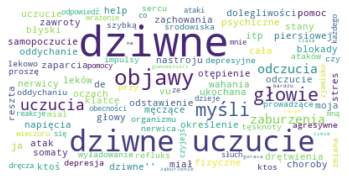

Cluster: 19
Titles
There are 91 topics
             Czy ja jestem chory? - proszę o pomoc
     witam ,proszę o pomoc czy to napewno nerwica?
                                    Proszę o pomoc
         Proszę o pomoc! Lęk przed własnym umysłem
                                    Proszę o pomoc
 Nerwica? Czy zupełnie cos innego? Bardzo prosz...
                             Bardzo proszę o pomoc
                            Witam i o ocenę proszę
     Ogromny lęk,brak siły do życia proszę o pomoc
                 Jestem tu nowa, proszę o pomoc...
           Robienie sobie krzywdy - proszę o pomoc
                               Proszę o dobre rady
                             Bardzo proszę o pomoc
                             Bardzo proszę o pomoc
                           Proszę o pomoc. Please.
                               Pomóżcie mi proszę.
                 Proszę o pomoc w miarę możliwości
                    praca i nerwy - proszę o pomoc
 Nerwica lękowa, urojenie, nastrętna myśl, 

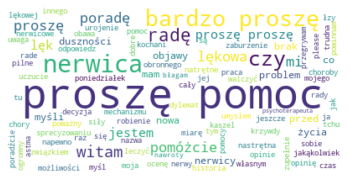

Cluster: 20
Titles
There are 97 topics
                                Problem z rodzicem
                  Pomóżcie, mam problem ze stresem
      Brak apetytu i problem ze zmianą trybu życia
                             Problem z oddychaniem
                      Mój problem - moja spowiedź.
                           Problem z mimiką twarzy
 Problem z różnymi sytuacjami (stres, ból brzuc...
    Zróżnicowana diagnoza-problem z interpretacja.
                            Duży problem z nerwica
                                Mój problem z sobą
               Nerwica czy borelioza? Mój problem.
                      Mój narzeczony ma problem...
 Problem z jazdą samochodem, który utrudnia mi ...
                                 Medytacja problem
                                    Dziwny problem
               Problem z wf, a możliwe rozwiązania
                 Problem z tożsamością i nie tylko
                Nerwica czy problem neurologiczny?
                    Problem nawiązywaniu ko

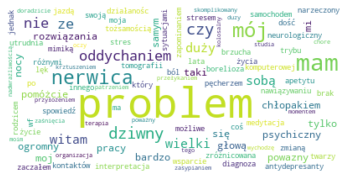

Cluster: 21
Titles
There are 177 topics
          Czy to są objawy nerwicy?-WĄTEK ZBIORCZY
                      Parasomnie w nerwicy lękowej
                                    Nawrót nerwicy
 LSD czyli jak wyszedłem z nerwicy i stanów dep...
                             Etapy trwania nerwicy
    Rozpoznawanie objawów nerwicy a zwykle choroby
         Spotkaliście się z takim objawem nerwicy?
                          Z nerwicy w uzależnienie
                 Senność w nerwicy natręctw? (OCD)
    zatkany nos - przyczyną czy skutkiem nerwicy ?
                            Czy to objawy nerwicy?
         Zaburzenia snu przy nerwicy i hipochondri
                       Zmęczenie w nerwicy lękowej
                            Wpływ nerwicy na naukę
              chroniczna, nagla sennosc w nerwicy.
 Antydepresanty a grypa chorował ktoś z was w t...
          Czynniki wpływające na powstanie nerwicy
             Historia pewnej nerwicy i kilka pytań
                          WSZYSTKIE OBJAWY

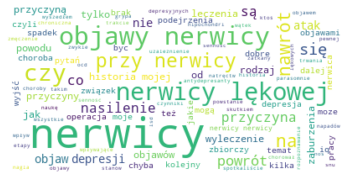

Cluster: 22
Titles
There are 10 topics
 Zmęczenie, neurastenia - potrzebny dobry psych...
       Agorafobia z mdłościami czy szpital pomoże?
         Nerwica lękowa - szpital psychiatryczny ?
                            szpital psychiatryczny
                      Szpital w Komorowie - opinie
                      Szpital??oddział dzienny ???
                                         Szpital..
            Szpital Psychiatryczny - Diagnostyka ?
                     Czy szpital to ostatecznosc??
                            Szpital w Abramowicach


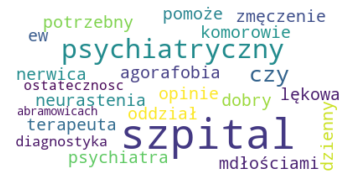

Cluster: 23
Titles
There are 1 topics
 Moje Wypociny ... Nerwica.


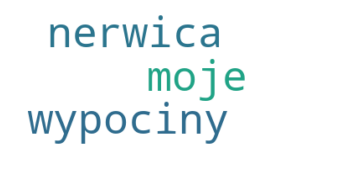

Cluster: 24
Titles
There are 62 topics
       Problemy z jasnym mysleniem, zamulony mózg.
                               problemy z prostata
                               Problemy w relaksie
                                     Moje problemy
            Ciagle problemy ze snem, albo brak snu
                                 Problemy ze snem.
                 Nerwica lękowa a problemy w pracy
                                samotność problemy
          Problemy z równowagą spowodowane nerwicą
                             PROBLEMY Z POŁYKANIEM
                       Nerwica a poważne problemy?
                                 Problemy ze skórą
 Nerwica-wasze doswiadczenia, problemy gastrycz...
 Problemy żołądkowo-jelitowe w sumie sam nie wi...
      Problemy z sercem,kołatanie,skurcze i reszta
     Problemy nerwicowo/neurologiczne od 10 lat...
                         Problemy z życiem i ojcem
              Zaburzenia lekowe a problemy z nauką
          Zachwiania równowagi i problemy z

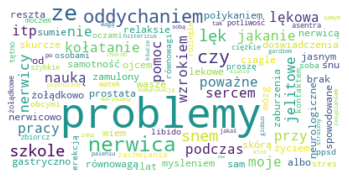

Cluster: 25
Titles
There are 98 topics
       Nie panuje nad stresem + trzesace sie rece.
                  gdy wyprowadzka staje sie traumą
             Nie wiem juz sam co sie ze mna dzieje
                         Kiedy to sie skończy ? ;(
                     nie wiem co sie ze mna dzieje
 Czym sie suplementowac podczas regularnego pic...
 Unikanie miejsca pracy- sposob na pozbycie sie...
    Nie wydaje sie wam, że terapia to pic na wode?
 nerwica myślowa wobec ukochanego?jak sie zacho...
                               ratunku boje sie!!!
                   głos mi sie zmienia przez nerwy
         czy mozna pozbyc sie diagnozy z kartoteki
 Pomozcie mi, swiruje, cos sie ze mna dzieje zl...
                                      Budzę sie...
 Czy to możliwe by jedno z rodziców przyczyniło...
                 Podzielmy sie poradami terapeutów
                                    ZLE SIE CZUJE!
 18 lat- dzien urodzin, ktory zamienil sie w ho...
                  Boje sie ze mam guza w gl

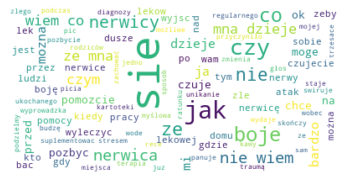

Cluster: 26
Titles
There are 139 topics
                                    Nerwica lękowa
                         Tężyczka a nerwica lękowa
                        Nerwica lękowa a marihuana
               Objawy somatyczne, a nerwica lękowa
                                    Nerwica lękowa
                     Nerwica lękowa na wesoło :)..
                        Kandydoza - Nerwica lękowa
                                    nerwica lękowa
           Nerwica lękowa bardzo złe samopoczucie.
           nagłe kołatania serca/ nerwica lękowa??
               Nerwica lękowa, A tworzenie związku
                 Nerwica lękowa a ciągłe odbijania
                                    Nerwica lękowa
                Nerwica lękowa - objawy somatyczne
                          Nerwica lękowa/natręctwa
                                    Nerwica lękowa
                                    Nerwica lękowa
                       Nerwica lękowa-kancerofobia
                                    Nerwic

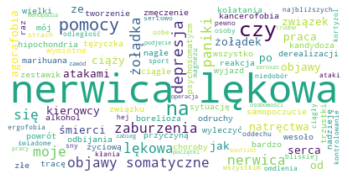

Cluster: 27
Titles
There are 39 topics
                         czystość umysłu - pytanie
                                   Szybkie pytanie
                                   Pytanie problem
 Tabletki MAGNE B6 [PYTANIE DO OSOB Z NIEDOBORE...
                          Pytanie na temat badania
                                          Pytanie!
 Pytanie o stabilizator + inny dziwny problem (...
                                      Małe pytanie
                             pytanie co do nerwicy
                                           Pytanie
                  Mam pytanie do kazdego z nerwicą
                                           pytanie
                              Siemka mam pytanie ?
                         Pytanie o ciekawy objaw !
                              pytanie o nowotwor?!
                          Nerwica lękowa - pytanie
         szybkie pytanie szybka odpowiedź - PILNE!
                             Pytanie do wszystkich
            Pytanie! skąd u mnie takie zach

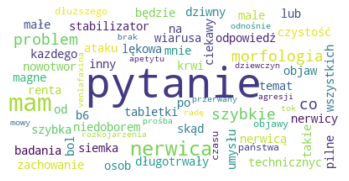

Cluster: 28
Titles
There are 136 topics
                   Drgawki... Czy to nerwica?
                              Czy to nerwica?
                   Czy to na pewno nerwica?:(
                   Czy to aby napewno nerwica
                      Czy napewno to nerwica?
                       Czy to nerwica lękowa?
                              Czy to nerwica?
                              Czy to nerwica?
                     Czy na pewno to nerwica?
                   Czy to faktycznie nerwica?
                              Czy to możliwe?
                          Czy to aby nerwica?
                  Czy to nerwica?/pomocy, mam
                     Czy to depersonalizacja?
                              Czy to nerwica?
                      Czy to napewno nerwica?
                     Czy to na pewno nerwica?
                  Czy to na pewno nerwica????
                         Czy jest to nerwica?
                   Czy to nerwica? Zmarnowane
                              Czy to ner

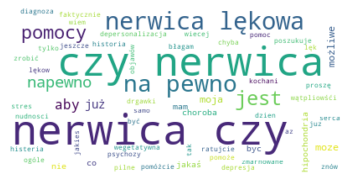

Cluster: 29
Titles
There are 60 topics
  Czy osoba z nerwicą lękową może skończyć studia?
  Jak radzicie sobie z nerwicą w czasach pandemi ?
                     Nerwicą, odstawianie lorafenu
                                   Matka z nerwicą
                               Problem z nerwicą..
                         Choroby mylone z nerwicą!
                       Jak sobie radzić z nerwicą?
                                   Czy to nerwicą?
                        Jak sobie radzić z nerwicą
       jakiej pracy powinna szukac osoba z nerwicą
                               SERCOWCY Z NERWICĄ!
                             Znane osoby z nerwicą
 Brak możliwości pobrania krwi w związku z nerw...
                      Psycholog/pedagog z nerwicą?
                             Jak zacząć z nerwicą?
                       Co mam robić z tą nerwicą!?
                                 Problem z nerwicą
   Mam sporo dolegliwości, można łączyć z nerwicą?
                             Jak walczyć z 

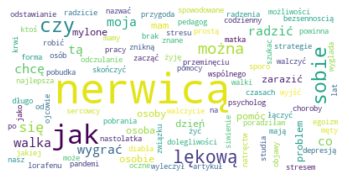

Cluster: 30
Titles
There are 69 topics
                                             Pomoc
                 NERWICA SOMATYCZNA PROSZE O POMOC
                             Bardzo prosze o pomoc
                                   Potrzebna pomoc
                                    Blagam o pomoc
                                   Prosze o pomoc!
                                     Prozę o pomoc
                                    prosze o pomoc
                                   Prosze o pomoc.
                              Pomoc dla nerwicowca
                                 BŁAGAM O POMOC...
                                  Wołanie o pomoc.
                           Bardzo prosze o pomoc !
               CZY TO NERWICA??? prosze o pomoc...
              Nerwica-Moje pytania,Prosze o pomoc.
                    natretne uczucia prosze o rade
                                 Do kogo po pomoc?
                      Moja histora- prosze o pomoc
                             Prosze o jakąś

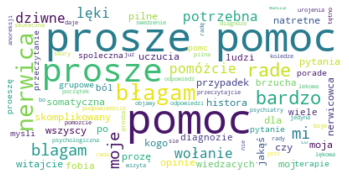

Cluster: 31
Titles
There are 22 topics
                                          Leczenie
                       Leczenie nerwicy witaminami
 Leczenie nerwicy, a strach przed skutkami uboc...
      Leczenie w zakładzie psychiatrycznym nerwicy
                           Moja choroba a leczenie
                      Witam - podjąłem leczenie ;)
            Czy brnąć w leczenie antydepresantami?
          Ile pieniędzy kosztuje leczenie nerwicy?
                               Dalsze leczenie (?)
                 FOBIE NERWICE- LECZENIE ALKOHOLEM
  Zaburzenia lękowe, leczenie skutku czy przyczyny
            leczenie, terapia a kwestie finansowe.
               Biegunki na tle nerwowym - leczenie
                             LĘK NAPADOWY-LECZENIE
  Czy leczenie antydepresantami daje dobre efekty?
        Leczenie Fobii spolecznej poprzez hipnoze.
                      Leczenie na odziale dziennym
                                Pytania o leczenie
                              Nerwica - Lec

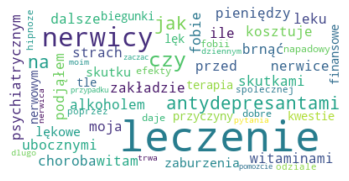

Cluster: 32
Titles
There are 171 topics
          Ataki (jak wyglądają, jak sobie radzimy)
                         Jak sobie z tym poradzić?
 Jak sobie poradzić z flashbackami? (niemiłe ws...
 Jak poradzić sobie z paranoją po doświadczenia...
               Objawy somatyczne - jak jest u Was?
        Jak stworzyć związek mając nerwicę lękowa?
                Jak poradzić sobie z hipochondrią?
                               Jak sobie poradzić?
               jak mam pomóc bratu czy to nerwica?
          Jak żyjecie jak funkcjonujecie z nerwica
 poczucie życia w symulacji, ogromne odrealnien...
           Ciągle napięcie, odczucie jak w filmie.
             Jak nie myśleć o popełninych błędach?
              Nienawidzę siebię za to jak wyglądam
                  Jak radzicie sobie w ciągu dnia?
          Psychiatra jak uwierzyć że to nerwica :)
                        Jak zacząć uprawiać sport?
                                       Jak wygląda
       Błagam doradzcie, jak mam sobie por

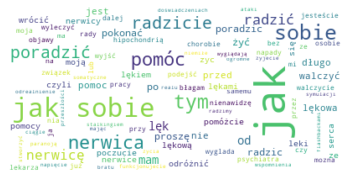

Cluster: 33
Titles
There are 48 topics
                          Czy to może być nerwica?
                 Przeczytajcie może wy pomożecie..
                          Co to może być? Diagnoza
 "Gula" w gardle, problemy z przełykaniem - czy...
                          Czy to może być nerwica?
               Ja i mój blog , MOŻE KOMUŚ POMÓC :)
                                     może nerwica?
                          Czy to może być nerwica?
        Czy ktoś może mi pomóc? Strasznie sie boje
                           Czy ktoś mi może pomóc?
 Problem z odbieraniem bodźców z zewnątrz-co to...
                                    co to może być
         Objawów ciąg dalszy, może ktoś wesprze...
 Lekki ucisk w głowie - czy to może być coś pow...
 Pare zwyciestw i porazka - długie i być może n...
                           Czy ktoś mi może pomóc?
                nerwica lękowa a może socjofobia ?
 Czy to obsesja, mania czy NN ? a Może coś inne...
                       Co to może być ? Pom

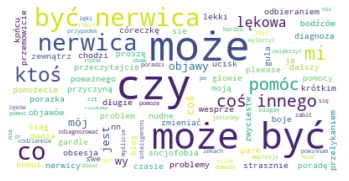

Cluster: 34
Titles
There are 53 topics
 Nerwica a głowa,zawroty, ucisk i inne dolegliw...
           Zawroty głowy jak sobie z nimi radzicie
                           Sekundowe zawroty głowy
                   Zawroty głowy, uczucie słabości
                             Uciskające bóle głowy
          Bóle głowy, karku non stop od 5 miesięcy
                      Napieciowy ból głowy a benzo
                             napięciowe bóle głowy
          Napięciowe bóle głowy - da się wyleczyć?
          zawroty głowy i przypływy lęku od wzroku
                              napięciowy ból głowy
                                     drżenia głowy
                               Ból głowy a nerwica
                                     Zawroty głowy
                             Napięciowy ból głowy?
         Bóle kręgosłupa, zawroty głowy a nerwica?
                                  Dziwny ból głowy
                                 Bóle głowy i lęki
      Znalazłam sposób na mdłości i zawroty

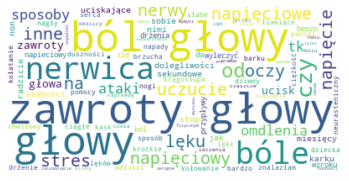

In [39]:
from wordcloud import WordCloud
result={'cluster':labels,'title':topics}

result=pd.DataFrame(result)
for k in range(0,true_k):
    s=result[result.cluster==k]
    text=s['title'].str.cat(sep=' ')
    text=text.lower()
    text=' '.join([word for word in text.split()])
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
    print('Cluster: {}'.format(k))
    print('Titles')
    titles=boards_cl[boards_cl.cluster==k]['title']
    print('There are {} topics'.format(len(titles)))
    print(titles.to_string(index=False))
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()